### Task 1

- Load California Housing dataset and select 2 features (e.g., Median Income, House 
Age) and 1 target (Median House Value). 
- Normalize inputs and initialize a single-layer NN with random weights and bias. 
- Perform forward propagation, calculate prediction error, Squared Error, and MSE. 
- Update weights and bias using gradient descent. 
- Plot Loss vs Weight, Loss vs Bias, and Error Surface.

In [15]:
import pandas as pd
import numpy as np


In [16]:
X = pd.read_csv('Data\housing.csv')

<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\Smayan Kulkarni\AppData\Local\Temp\ipykernel_23104\2826990410.py:1: SyntaxWarning: invalid escape sequence '\h'
  X = pd.read_csv('Data\housing.csv')


In [17]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [18]:
y = X[['median_house_value']].values
X = X[['median_income', 'households']].values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
np.random.seed(42)
weights = np.random.rand(X.shape[1])
bias = np.random.rand(1)
initial_weights = weights.copy()
initial_bias = bias.copy()

In [20]:
def forwardprop(X,weights,bias):
    layer_input = np.dot(X,weights) + bias
    layer_output = layer_input #Regression
    return layer_output
    

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_preds = forwardprop(X_scaled, weights, bias)
pred_errors = y.flatten() - y_preds
squared_errors = pred_errors ** 2

print("Initial Metrics:")
print(f"Sample Prediction Errors: {pred_errors[:5]}")
print(f"Sample Squared Errors: {squared_errors[:5]}")
print(f"Initial MSE: {mean_squared_error(y, y_preds)}")
print(f"Initial MAE: {mean_absolute_error(y, y_preds)}")

Initial Metrics:
Sample Prediction Errors: [452599.31867632 358496.80683353 352099.4023713  341299.61618881
 342199.87097924]
Sample Squared Errors: [2.04846143e+11 1.28519961e+11 1.23973989e+11 1.16485428e+11
 1.17100752e+11]
Initial MSE: 56104455234.26047
Initial MAE: 206855.08491497295


In [22]:
epochs = 100
learning_rate = 0.01
loss_history = []
weight_history = []
bias_history = []

for i in range(epochs):
    y_preds = forwardprop(X_scaled, weights, bias)
    
    error = y.flatten() - y_preds
    dw = (-2/X.shape[0]) * np.dot(X_scaled.T, error)
    db = (-2/X.shape[0]) * np.sum(error)
    
    weights = weights - learning_rate * dw
    bias = bias - learning_rate * db
    
    mse = mean_squared_error(y, y_preds)
    loss_history.append(mse)
    weight_history.append(weights.copy())
    bias_history.append(bias.copy())
    
    if i % 10 == 0:
        mae = mean_absolute_error(y, y_preds)
        print(f'Epoch {i}: MSE={mse:.2f}, MAE={mae:.2f}')

print(f"\nFinal MSE: {loss_history[-1]:.2f}")
print(f"Final Weights: {weights}")

print(f"Final Bias: {bias}")

Epoch 0: MSE=56104455234.26, MAE=206855.08
Epoch 10: MSE=39768032722.60, MAE=169022.72
Epoch 20: MSE=28863094281.99, MAE=138200.39
Epoch 30: MSE=21583770091.47, MAE=113695.77
Epoch 40: MSE=16724618078.15, MAE=95729.65
Epoch 50: MSE=13480986721.76, MAE=83207.44
Epoch 60: MSE=11315756532.03, MAE=74726.02
Epoch 70: MSE=9870389195.66, MAE=69080.18
Epoch 80: MSE=8905552137.81, MAE=65547.43
Epoch 90: MSE=8261484775.36, MAE=63423.78

Final MSE: 7867146896.05
Final Weights: [68814.40211502  5973.17294627]
Final Bias: [179422.78741292]


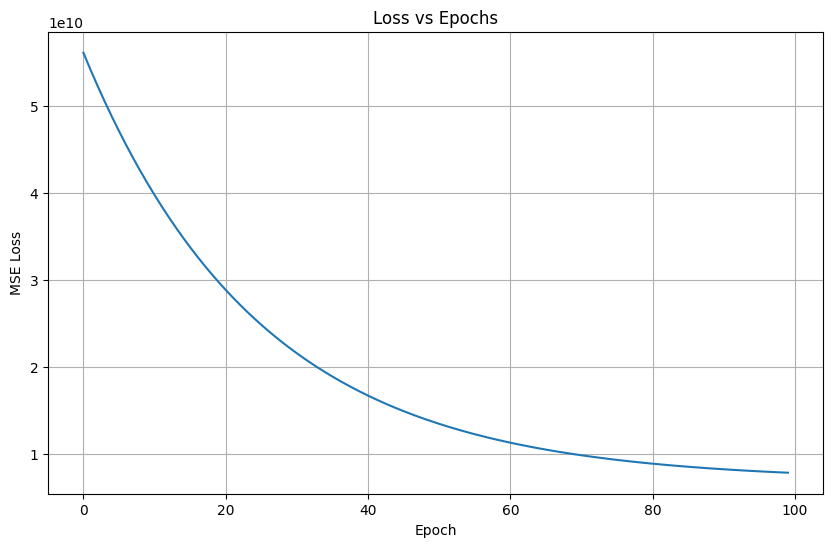

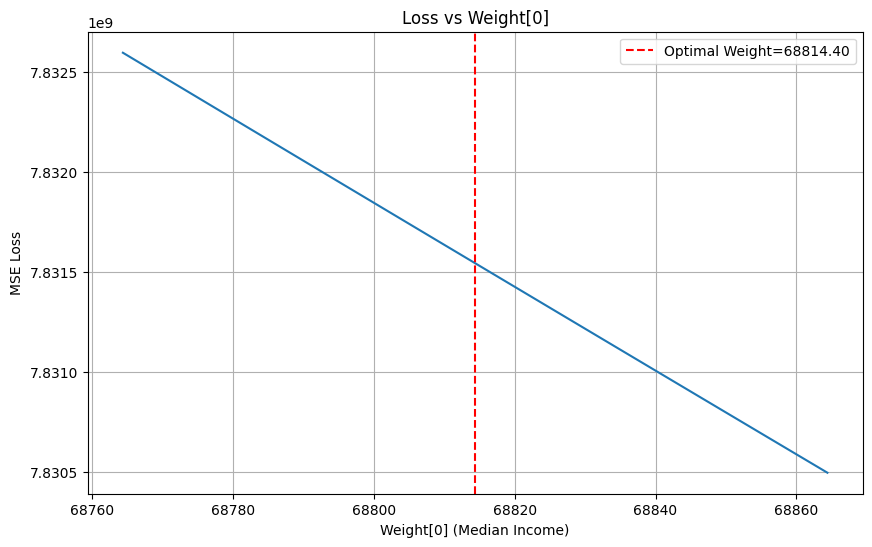

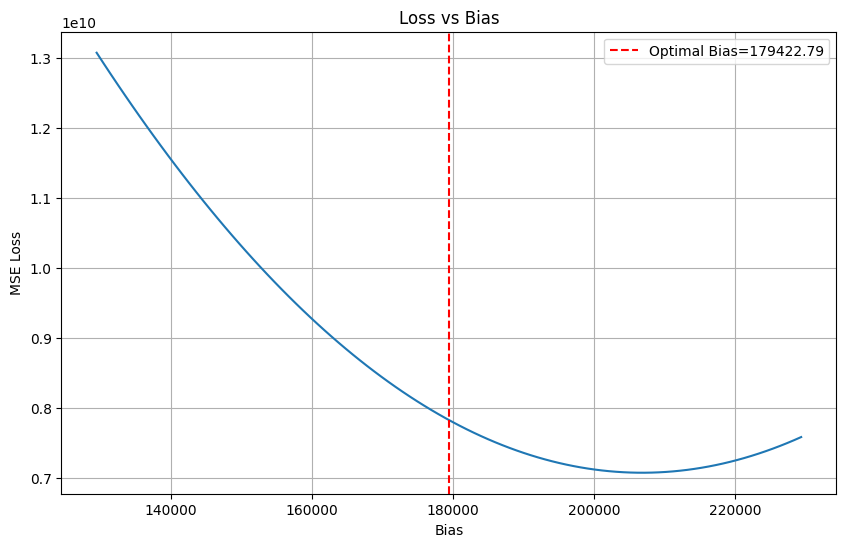

In [23]:
import matplotlib.pyplot as plt
# Plot 1: Loss vs Epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss vs Epochs')
plt.grid(True)
plt.show()

# Plot 2: Loss vs Weight (for first weight)
def calculate_loss_for_weight(w_val, w_idx):
    temp_weights = weights.copy()
    temp_weights[w_idx] = w_val
    y_pred = forwardprop(X_scaled, temp_weights, bias)
    return mean_squared_error(y, y_pred)

weight_range = np.linspace(weights[0] - 50, weights[0] + 50, 100)
losses_w0 = [calculate_loss_for_weight(w, 0) for w in weight_range]

plt.figure(figsize=(10, 6))
plt.plot(weight_range, losses_w0)
plt.xlabel('Weight[0] (Median Income)')
plt.ylabel('MSE Loss')
plt.title('Loss vs Weight[0]')
plt.axvline(x=weights[0], color='r', linestyle='--', label=f'Optimal Weight={weights[0]:.2f}')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Loss vs Bias
def calculate_loss_for_bias(b_val):
    y_pred = forwardprop(X_scaled, weights, b_val)
    return mean_squared_error(y, y_pred)

bias_range = np.linspace(bias[0] - 50000, bias[0] + 50000, 100)
losses_bias = [calculate_loss_for_bias(b) for b in bias_range]

plt.figure(figsize=(10, 6))
plt.plot(bias_range, losses_bias)
plt.xlabel('Bias')
plt.ylabel('MSE Loss')
plt.title('Loss vs Bias')
plt.axvline(x=bias[0], color='r', linestyle='--', label=f'Optimal Bias={bias[0]:.2f}')
plt.legend()
plt.grid(True)
plt.show()

